@Author: Bhupinder Singh

@Date: 07-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 10-01-2023

@Title: Write a Python program to implement Linear Regression Model.

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats

### Import the dataset 

In [251]:
data = pd.read_csv('weatherHistory.csv')

### Getting Insights of dataset

In [252]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [253]:
data.describe()

,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Formatted Date          96453 non-null  object 
 1   Summary                 96453 non-null  object 
 2   Precip Type             95936 non-null  object 
 3   Temperature (C)         96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind Speed (km/h)       96453 non-null  float64
 7   Wind Bearing (degrees)  96453 non-null  int64  
 8   Visibility (km)         96453 non-null  float64
 9   Loud Cover              96453 non-null  int64  
 10  Pressure (millibars)    96453 non-null  float64
 11  Daily Summary           96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


### Checking for Null values in data set

In [255]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Apparent_Temperature_C      0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Checking for Outliers in data set

<AxesSubplot: xlabel='Apparent_Temperature_C'>

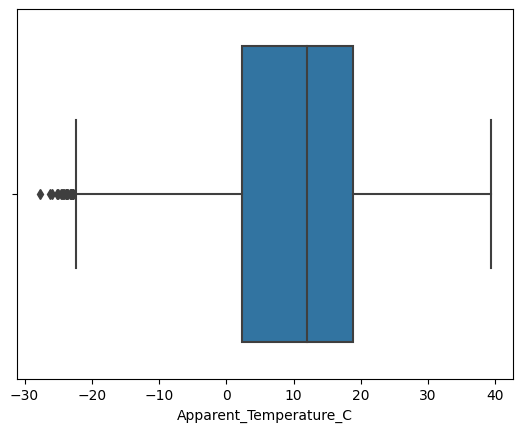

In [256]:
sns.boxplot(x=data['Apparent_Temperature_C'])

<AxesSubplot: xlabel='Humidity'>

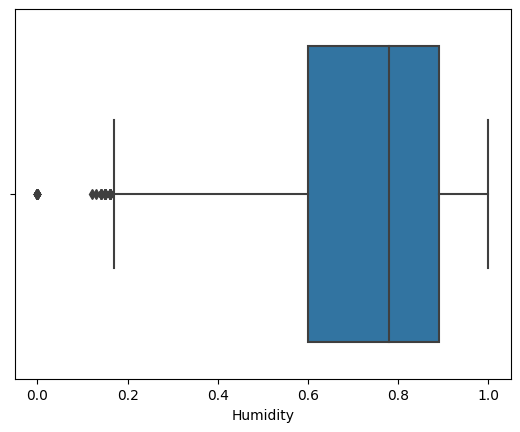

In [257]:
sns.boxplot(x=data['Humidity'])

In [258]:
data['zscore_Apparent_Temperature_C'] = ( data.Apparent_Temperature_C - data.Apparent_Temperature_C.mean() ) / data.Apparent_Temperature_C.std()
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,-0.324034
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,-0.339095
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,-0.138102
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,-0.459068
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,-0.362467


In [259]:
data['zscore_humidity'] = ( data.Humidity - data.Humidity.mean() ) / data.Humidity.std()
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,-0.324034,0.793466
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,-0.339095,0.639992
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,-0.138102,0.793466
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,-0.459068,0.486518
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,-0.362467,0.486518


In [260]:
data[(data.zscore_humidity<-3) | (data.zscore_humidity>3) |(data.zscore_Apparent_Temperature_C<-3) | (data.zscore_Apparent_Temperature_C>3)]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
3240,2006-01-23 00:00:00.000 +0100,Breezy and Overcast,snow,-11.533333,-21.716667,0.65,31.5721,12,15.8746,0,1031.31,Mostly cloudy starting overnight continuing un...,-3.044981,-0.434326
3242,2006-01-23 02:00:00.000 +0100,Overcast,snow,-11.555556,-21.255556,0.63,28.2394,11,15.8746,0,1032.11,Mostly cloudy starting overnight continuing un...,-3.001874,-0.536642
3243,2006-01-23 03:00:00.000 +0100,Overcast,snow,-12.111111,-21.555556,0.65,25.6312,11,15.8746,0,1032.72,Mostly cloudy starting overnight continuing un...,-3.029919,-0.434326
3244,2006-01-23 04:00:00.000 +0100,Overcast,snow,-12.550000,-21.750000,0.63,23.5704,2,15.0052,0,1033.33,Mostly cloudy starting overnight continuing un...,-3.048097,-0.536642
3245,2006-01-23 05:00:00.000 +0100,Overcast,snow,-12.644444,-21.922222,0.60,23.8119,2,8.1949,0,1034.18,Mostly cloudy starting overnight continuing un...,-3.064197,-0.690117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55492,2012-02-09 04:00:00.000 +0100,Foggy,snow,-20.277778,-25.072222,0.79,5.6672,158,1.8032,0,1033.53,Foggy until morning.,-3.358677,0.281886
55508,2012-02-09 20:00:00.000 +0100,Partly Cloudy,snow,-16.111111,-21.661111,0.00,8.0500,180,4.0250,0,1029.40,Foggy until morning.,-3.039787,-3.759598
55511,2012-02-09 23:00:00.000 +0100,Foggy,snow,-17.777778,-17.777778,0.00,0.0000,0,1.4490,0,1030.60,Foggy until morning.,-2.676752,-3.759598
58164,2012-03-26 13:00:00.000 +0200,Partly Cloudy,rain,13.888889,13.888889,0.12,28.9800,10,9.9820,0,1028.00,Partly cloudy starting in the morning continui...,0.283622,-3.145702


### Removing Outliers

In [261]:
print(f"Shape of data set before removing outliers{data.shape}")

Shape of data set before removing outliers(96453, 14)


In [262]:
data= data[(data.zscore_humidity>-2) & (data.zscore_humidity<2) & (data.zscore_Apparent_Temperature_C>-3) & (data.zscore_Apparent_Temperature_C<3)]
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,-0.324034,0.793466
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,-0.339095,0.639992
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,-0.138102,0.793466
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,-0.459068,0.486518
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,-0.362467,0.486518


In [263]:
print(f"Shape of data set after removing outliers{data.shape}")

Shape of data set after removing outliers(92010, 14)


### Feature Scaling

In [264]:
def feature_standarization(data_frame,col_name):
    standarized_output = []
    for i in data_frame[col_name]:
        standarized_value = (i - data_frame[col_name].mean())/data_frame[col_name].std()
        standarized_output.append(standarized_value)
    return standarized_output

In [265]:
Humidity_list = feature_standarization(data,'Humidity')
Apparent_Temperature_C_list = feature_standarization(data,'Apparent_Temperature_C')
data.drop(['Humidity','Apparent_Temperature_C'],axis=1,inplace=True)
data.insert(loc=0, column="Humidity", value=Humidity_list)
data.insert(loc=1, column="Apparent_Temperature_C", value=Apparent_Temperature_C_list)

In [266]:
display(data)

,Humidity,Apparent_Temperature_C,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
0,0.770933,-0.269615,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,-0.324034,0.793466
1,0.598345,-0.285248,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,-0.339095,0.639992
2,0.770933,-0.076635,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,-0.138102,0.793466
3,0.425758,-0.409769,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,-0.459068,0.486518
4,0.425758,-0.309505,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,-0.362467,0.486518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,-1.875412,1.537826,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,1.417393,-1.559803
96449,-1.587766,1.398751,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,1.283397,-1.304013
96450,-1.127532,1.151865,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,1.045529,-0.894749
96451,-0.897415,1.101733,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.,0.997228,-0.690117


### 3. Split the dataset into training set and test set

In [292]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,Humidity,Apparent_Temperature_C,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
0,0.770933,-0.269615,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,-0.324034,0.793466
1,0.598345,-0.285248,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,-0.339095,0.639992
2,0.770933,-0.076635,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,-0.138102,0.793466
3,0.425758,-0.409769,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,-0.459068,0.486518
4,0.425758,-0.309505,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,-0.362467,0.486518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77418,1.001050,0.208524,2014-11-08 22:00:00.000 +0100,Mostly Cloudy,rain,12.316667,3.2361,68,8.1788,0,1014.63,Mostly cloudy throughout the day.,0.136642,0.998098
77419,1.001050,0.143299,2014-11-08 23:00:00.000 +0100,Mostly Cloudy,rain,11.644444,6.0858,352,7.8729,0,1014.34,Mostly cloudy throughout the day.,0.073799,0.998098
77420,1.001050,0.141142,2014-11-09 00:00:00.000 +0100,Mostly Cloudy,rain,11.622222,1.5295,320,4.0250,0,1014.41,Foggy in the morning.,0.071721,0.998098
77421,1.173638,0.103948,2014-11-09 01:00:00.000 +0100,Mostly Cloudy,rain,11.238889,3.1073,100,4.5241,0,1014.08,Foggy in the morning.,0.035885,1.151573


Test dataframe


,Humidity,Apparent_Temperature_C,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
77423,0.655875,0.127666,2014-11-09 03:00:00.000 +0100,Mostly Cloudy,rain,11.483333,5.7638,138,3.9284,0,1013.85,Foggy in the morning.,0.058737,0.691150
77424,1.001050,0.025785,2014-11-09 04:00:00.000 +0100,Mostly Cloudy,rain,10.433333,13.6045,133,4.8139,0,1014.03,Foggy in the morning.,-0.039422,0.998098
77425,1.173638,-0.073400,2014-11-09 05:00:00.000 +0100,Foggy,rain,10.000000,6.2790,157,0.6762,0,1014.40,Foggy in the morning.,-0.134985,1.151573
77426,1.403755,-0.187679,2014-11-09 06:00:00.000 +0100,Foggy,rain,9.955556,12.3004,180,0.1610,0,1014.70,Foggy in the morning.,-0.245090,1.356205
77427,1.058579,-0.197382,2014-11-09 07:00:00.000 +0100,Foggy,rain,9.866667,12.2360,193,0.3703,0,1015.01,Foggy in the morning.,-0.254439,1.049256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,-1.875412,1.537826,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.,1.417393,-1.559803
96449,-1.587766,1.398751,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.,1.283397,-1.304013
96450,-1.127532,1.151865,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.,1.045529,-0.894749
96451,-0.897415,1.101733,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.,0.997228,-0.690117


((73608, 14), (18402, 14))

### Extracting the values of features

In [293]:
data_n=train_data.values
m=len(data_n[:,-1])  # Size of column X
x_train=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y_train=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1)) # Initially taking theta as (1,1)

In [294]:
print(x_train.shape)
print(y_train.shape)

(73608, 2)
(73608, 1)


In [295]:
def computeCost(x_train,y_train,theta):
    """
    Description:
            generate the cost function of using theta as parameter in a linear regression model
    Parameter:
        x_train: x values from train dataset
        y_train: y values from train dataset
        theta: theta values from gradient descent function
    Return:
            Returns computed cost
    """
    square_err=(x_train.dot(theta) - y_train)**2
    
    return 1/(2*len(x_train)) * np.sum(square_err)

In [296]:
computeCost(x_train,y_train,theta)

0.5106112758672281

In [298]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    """
    Description:
            update theta by taking   num_iters gradient steps with learning rate of alpha
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: theta values initially taken as (1,1)
        alpha: learning rate
        num_iters: Number of epochs
    Return:
            Returns the computed theta and cost function value
    """
    J_history=[]
    
    for i in range(num_iters):
        theta=theta-alpha * 1/len(x_train) * np.dot(x_train.transpose(),(x_train.dot(theta) - y_train))
        cost= computeCost(x_train,y_train,theta)
        J_history.append(cost)
        print(f"For Epoch {i} Theta :{theta} Cost = {cost}")
    return theta,J_history

In [299]:
alpha= 0.01
epochs= 500
theta,J_history= gradientDescent(x_train,y_train,theta,alpha,epochs)
print(f"Final theta values : {theta}")
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

For Epoch 0 Theta :[[-0.00017723813842074963]
 [-0.0056300302780848775]] Cost = 0.5074542266056409
For Epoch 1 Theta :[[-0.0003535757108376524]
 [-0.011203903889542698]] Cost = 0.5043598127103806
For Epoch 2 Theta :[[-0.0005290130269991324]
 [-0.016722181102643854]] Cost = 0.5013267912123853
For Epoch 3 Theta :[[-0.000703550480314191]
 [-0.0221854165945868]] Cost = 0.49835394381456316
For Epoch 4 Theta :[[-0.0008771885461500091]
 [-0.027594159507306086]] Cost = 0.4954400764019628
For Epoch 5 Theta :[[-0.0010499277801552416]
 [-0.03294895350272337]] Cost = 0.4925840185616449
For Epoch 6 Theta :[[-0.0012217688166086022]
 [-0.03825033681744727]] Cost = 0.48978462311212023
For Epoch 7 Theta :[[-0.0013927123667924447]
 [-0.04349884231692631]] Cost = 0.4870407656421287
For Epoch 8 Theta :[[-0.001562759217391014]
 [-0.04869499754906192]] Cost = 0.4843513440585661
For Epoch 9 Theta :[[-0.0017319102289129887]
 [-0.05383932479728563]] Cost = 0.48171527814337406
For Epoch 10 Theta :[[-0.001900166

Text(0.5, 1.0, 'Cost function using Gradient Descent')

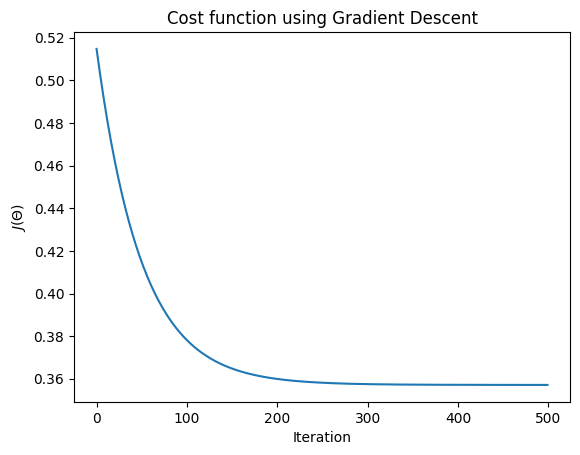

In [275]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Ploting data points with best fit line')

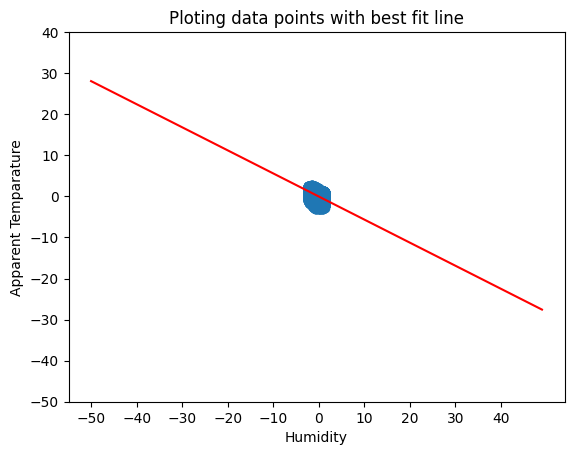

In [276]:
plt.scatter(train_data.Humidity,train_data.Apparent_Temperature_C)
x_value=[x for x in range(-50,50)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(-50,50,step=10))
plt.yticks(np.arange(-50,50,step=10))
plt.xlabel("Humidity")
plt.ylabel("Apparent Temparature")
plt.title("Ploting data points with best fit line")

In [277]:
# collecting x & y
x_test = test_data['Humidity'].values
y_test = test_data['Apparent_Temperature_C'].values

In [278]:
test_data.head()

,Humidity,Apparent_Temperature_C,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,zscore_Apparent_Temperature_C,zscore_humidity
72559,0.655875,-0.749911,2014-02-17 07:00:00.000 +0100,Mostly Cloudy,rain,4.866667,10.3523,310,6.3595,0,1016.36,Mostly cloudy throughout the day.,-0.786787,0.691150
72560,0.253170,-0.697623,2014-02-17 08:00:00.000 +0100,Mostly Cloudy,rain,6.061111,15.6653,331,9.7083,0,1017.54,Mostly cloudy throughout the day.,-0.736409,0.333044
72561,0.253170,-0.584422,2014-02-17 09:00:00.000 +0100,Mostly Cloudy,rain,7.127778,16.8567,19,9.9015,0,1017.70,Mostly cloudy throughout the day.,-0.627342,0.333044
72562,0.425758,-0.467986,2014-02-17 10:00:00.000 +0100,Mostly Cloudy,rain,7.694444,13.2342,36,9.9015,0,1017.16,Mostly cloudy throughout the day.,-0.515160,0.486518
72563,0.080582,-0.181750,2014-02-17 11:00:00.000 +0100,Mostly Cloudy,rain,9.811111,10.7387,49,9.8532,0,1017.06,Mostly cloudy throughout the day.,-0.239377,0.179570


In [279]:
print(y_test)
print(test_data['Humidity'])

[-0.74991064 -0.6976226  -0.58442168 ...  1.15186478  1.10173294
  0.9966178 ]
72559    0.655875
72560    0.253170
72561    0.253170
72562    0.425758
72563    0.080582
           ...   
96448   -1.875412
96449   -1.587766
96450   -1.127532
96451   -0.897415
96452   -0.839886
Name: Humidity, Length: 23003, dtype: float64


In [280]:
#y_pred=[(item*theta[1]+theta[0]).tolist() for item in x_test]
y_pred=[(item*theta[1]+theta[0]).tolist() for item in test_data['Humidity']]

In [281]:
y_pred

[[-0.3985512352858458],
 [-0.17223928526206528],
 [-0.17223928526206528],
 [-0.2692301209865424],
 [-0.07524844953758777],
 [-0.2692301209865424],
 [-0.17223928526206528],
 [-0.2692301209865424],
 [-0.1075787281124136],
 [-0.3985512352858458],
 [-0.3985512352858458],
 [-0.5925329067348009],
 [-0.5925329067348009],
 [-0.5925329067348009],
 [-0.5925329067348009],
 [-0.6248631853096263],
 [-0.5925329067348009],
 [-0.6895237424592779],
 [-0.6895237424592779],
 [-0.6895237424592779],
 [-0.5925329067348009],
 [-0.6895237424592779],
 [-0.8188448567585813],
 [-0.5925329067348009],
 [-0.6248631853096263],
 [-0.8188448567585813],
 [-0.5925329067348009],
 [-0.3338906781361941],
 [-0.07524844953758777],
 [0.11873322191136723],
 [0.11873322191136723],
 [0.11873322191136723],
 [0.11873322191136723],
 [0.08640294333654142],
 [-0.2692301209865424],
 [-0.36622095671101995],
 [-0.3985512352858458],
 [-0.5925329067348009],
 [-0.4632117924354975],
 [-0.4955420710103233],
 [-0.4632117924354975],
 [-0.56020

### calculating R-squared value for measuring goodness of our model. 

In [282]:
# calculating R-squared value for measuring goodness of our model. 
mean_y = np.mean(y_test)
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals
for i in range(len(x_test)): # val_count represents the no.of input x values
  
  ss_t += (y_test[i] - mean_y) ** 2
  ss_r += (y_test[i] - y_pred[i]) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

[0.30327083]


### Calculating Mean Square Error

In [283]:
summation = 0  #variable to store the summation of differences
n = len(x_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y_test[i] - y_pred[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  [0.61877599]


### Calculating Mean Absolute Error 

In [284]:
# Calculating Mean Absolute Error  
n = len(x_test)
sum = 0  
# for loop for iteration
for i in range(n):
    sum += abs(y_test[i] - y_pred[i])
  
error = sum/n
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : [0.65209324]


### Calculating Root Mean Square Error

In [285]:
n = len(x_test)
sum=0
for i in range(n):
    squared_diff = (y_test[i]-y_pred[i])**2
    sum+= squared_diff
error = sum/n
error=error**0.5 

print("Root Mean Square Error:\n")
print(error)

Root Mean Square Error:

[0.78662316]


### calculating Adjusted R-squared value for measuring goodness of our model. 

In [286]:
#calculate r-squared
N=len(x_test)
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  [0.30324054]
